In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
tf.set_random_seed(777)
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
nb_classes = 10

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# Deep Neural Net Softmax

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch:    1, Cost: 42.079190999
Epoch:    2, Cost: 8.447481221
Epoch:    3, Cost: 4.548834898
Epoch:    4, Cost: 2.991374162
Epoch:    5, Cost: 2.305722886
Epoch:    6, Cost: 1.973160463
Epoch:    7, Cost: 1.951333604
Epoch:    8, Cost: 1.597440499
Epoch:    9, Cost: 1.540968707
Epoch:   10, Cost: 1.194044056
Epoch:   11, Cost: 0.897346614
Epoch:   12, Cost: 0.976178738
Epoch:   13, Cost: 0.863925915
Epoch:   14, Cost: 0.780795132
Epoch:   15, Cost: 0.703086734
Learning finished.
Accuracy:  0.9597
Label:  [0]
Prediction:  [0]


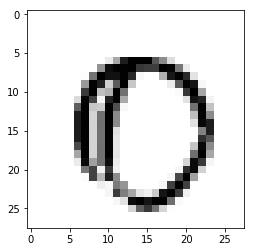

In [3]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.Variable(tf.random_normal([784, 256]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([256]), name = 'bias1')
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([256]), name = 'bias2')
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]), name = 'weight3')
b3 = tf.Variable(tf.random_normal([10]), name = 'bias3')
hypothesis = tf.matmul(L2, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples/batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([optimizer, cost], feed_dict = {X:batch_xs, Y:batch_ys})
            avg_cost += cost_val / num_iterations
        
        print(f'Epoch: {epoch+1:4d}, Cost: {avg_cost:.9f}')
        
    print('Learning finished.')
    
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()

# Xavier Initializer

Epoch:    1, Cost: 0.281431213
Epoch:    2, Cost: 0.141267237
Epoch:    3, Cost: 0.122151604
Epoch:    4, Cost: 0.105335086
Epoch:    5, Cost: 0.099611467
Epoch:    6, Cost: 0.094662379
Epoch:    7, Cost: 0.080921861
Epoch:    8, Cost: 0.087200245
Epoch:    9, Cost: 0.076322834
Epoch:   10, Cost: 0.072396263
Epoch:   11, Cost: 0.073202187
Epoch:   12, Cost: 0.079114914
Epoch:   13, Cost: 0.065738070
Epoch:   14, Cost: 0.066860179
Epoch:   15, Cost: 0.056896654
Learning finished.
Accuracy:  0.9713
Label:  [4]
Prediction:  [4]


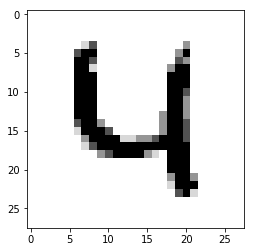

In [4]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.get_variable('W1', shape = [784, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = 'bias1')
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable('W2', shape = [256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = 'bias2')
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable('W3', shape = [256, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name = 'bias3')
hypothesis = tf.matmul(L2, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples/batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([optimizer, cost], feed_dict = {X:batch_xs, Y:batch_ys})
            avg_cost += cost_val / num_iterations
        
        print(f'Epoch: {epoch+1:4d}, Cost: {avg_cost:.9f}')
        
    print('Learning finished.')
    
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()